LETSGROWMORE

TASK-2 : Exploratory Data Analysis on Dataset - Terrorism

Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Reading dataset

In [ ]:
data=pd.read_csv("/content/globalterrorismdb_0718dist.csv",encoding='latin-1')
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0.0,NaN,58.0,Dominican Republic,2.0,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,NaN,NaN,0.0,1.0,0.0,1.0,Assassination,NaN,NaN,NaN,NaN,14.0,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0.0,NaN,130.0,Mexico,1.0,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,NaN,NaN,0.0,1.0,0.0,6.0,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7.0,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0.0,NaN,160.0,Philippines,5.0,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,NaN,NaN,0.0,1.0,0.0,1.0,Assassination,NaN,NaN,NaN,NaN,10.0,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0.0,NaN,78.0,Greece,8.0,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,NaN,NaN,0.0,1.0,0.0,3.0,Bombing/Explosion,NaN,NaN,NaN,NaN,7.0,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0.0,NaN,101.0,Japan,4.0,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0.0,NaN,NaN,1.0,1.0,1.0,-9.0,NaN,NaN,0.0,1.0,0.0,7.0,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7.0,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [ ]:
data.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9656 entries, 0 to 9655
Columns: 135 entries, eventid to related
dtypes: float64(77), int64(4), object(54)
memory usage: 9.9+ MB


In [ ]:
data.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,gsubname2,gname3,gsubname3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,...,claimmode,claim2,claimmode2,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,9.656000e+03,9656.000000,9656.000000,9656.000000,9655.000000,9655.000000,9655.000000,9353.000000,9353.000000,9655.000000,9655.000000,9655.000000,9655.000000,9655.000000,9655.000000,1131.000000,9655.000000,9655.000000,9655.0,9655.000000,19.000000,2.000000,9655.000000,9048.000000,9628.000000,134.000000,97.000000,110.000000,12.000000,8.000000,11.000000,0.0,0.0,0.0,9655.000000,22.000000,0.0,9655.000000,2284.000000,864.000000,...,216.000000,7.000000,6.000000,0.0,0.0,0.0,14.000000,9655.000000,7662.000000,482.00000,428.000000,49.000000,42.000000,11.000000,9.000000,8497.000000,1180.000000,1216.000000,7214.000000,1157.000000,1115.000000,9655.000000,4632.000000,2.765000e+03,9525.000000,800.000000,800.000000,250.000000,221.000000,9433.000000,2.820000e+02,1.0,7.900000e+01,1.0,449.000000,347.000000,9655.000000,9655.000000,9655.000000,9655.000000
mean,1.976036e+11,1975.971935,6.282001,15.164561,0.026308,220.367892,6.021647,33.155350,-20.829568,1.203418,0.007561,0.996271,0.988607,0.913206,-1.352874,1.343943,0.064526,0.905438,0.0,3.287623,4.368421,3.000000,6.432418,38.287025,159.560449,10.014925,51.422680,201.490909,5.250000,37.875000,170.090909,NaN,NaN,NaN,0.033868,0.500000,NaN,0.002589,-25.507443,-82.532407,...,4.430556,0.857143,3.333333,NaN,NaN,NaN,0.357143,6.694045,11.634691,6.36722,10.240654,6.428571,7.904762,6.272727,8.777778,0.815464,0.172034,0.287829,1.085805,0.395851,0.029596,0.574521,3.329231,1.334914e+05,0.083990,1.162500,0.322500,-1.150000,34.289593,0.030001,5.019458e+06,20000.0,1.498046e+06,0.0,2.810690,6.345821,-3.149871,-3.096634,0.347903,-1.825893
std,2.889043e+08,2.890571,3.368098,9.022129,0.160057,187.250876,3.289915,22.172133,53.255134,0.823601,0.086628,0.060952,0.106134,0.281548,3.393848,0.627684,0.245701,0.292625,0.0,2.072946,2.476793,1.414214,5.986308,29.561004,81.747810,6.941198,26.472012,71.945538,4.974937,23.172875,69.383650,NaN,NaN,NaN,0.180900,0.511766,NaN,0.050822,50.513616,37.319222,...,2.918233,0.377964,3.265986,NaN,NaN,NaN,0.497245,2.339840,6.926889,1.91395,7.172386,2.150581,7.650313,1.420627,7.462871,5.748584,1.075629,2.629879,7.200481,2.524054,0.254269,0.980974,0.505833,1.073869e+06,0.277387,164.201862,5.368381,14.439112,75.353816,0.170599,5.982205e+07,NaN,5.104807e+06,NaN,1.261473,23.262047,4.430647,4.482302,0.664311,4.232378
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-45.867889,-157.818968,1.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.0,1.000000,2.000000,2.000000,1.000000,1.000000,4.000000,1.000000,1.000000,30.000000,1.000000,8.000000,45.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,-99.000000,-99.000000,...,1.000000,0.000000,2.000000,NaN,NaN,NaN,0.000000,2.000000,1.000000,2.00000,2.000000,5.000000,2.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,2.000000,-9.900000e+01,0.000000,-99.000000,-99.000000,-99.000000,0.000000,0.000000,0.000000e+00,20000.0,0.000000e+00,0.0,2.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.974060e+11,1974.000000,3.000000,7.000000,0.000000,96.000000,2.000000,25.699073,-73.931351,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.0,2.000000,2.000000,2.500000,2

In [ ]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0.0,NaN,58.0,Dominican Republic,2.0,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,NaN,NaN,0.0,1.0,0.0,1.0,Assassination,NaN,NaN,NaN,NaN,14.0,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0.0,NaN,130.0,Mexico,1.0,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,NaN,NaN,0.0,1.0,0.0,6.0,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7.0,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0.0,NaN,160.0,Philippines,5.0,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,NaN,NaN,0.0,1.0,0.0,1.0,Assassination,NaN,NaN,NaN,NaN,10.0,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0.0,NaN,78.0,Greece,8.0,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,NaN,NaN,0.0,1.0,0.0,3.0,Bombing/Explosion,NaN,NaN,NaN,NaN,7.0,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0.0,NaN,101.0,Japan,4.0,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0.0,NaN,NaN,1.0,1.0,1.0,-9.0,NaN,NaN,0.0,1.0,0.0,7.0,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7.0,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [ ]:
data.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
9651,197911130005,1979,11,13,NaN,0.0,NaN,11.0,Argentina,3.0,South America,Buenos Aires,Buenos Aires,-34.617680,-58.444435,1.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,NaN,NaN,0.0,1.0,0.0,3.0,Bombing/Explosion,NaN,NaN,NaN,NaN,2.0,Government (General),21.0,Government Building/Facility/Office,NaN,Official Car,...,NaN,NaN,Automatic firearm; Explosive,4.0,NaN,NaN,0.0,NaN,NaN,1.0,3.0,Minor (likely < $1 million),5000.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
9652,197911130006,1979,11,13,NaN,0.0,NaN,45.0,Colombia,3.0,South America,Unknown,Las Delicias,NaN,NaN,5.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,NaN,NaN,0.0,1.0,0.0,2.0,Armed Assault,NaN,NaN,NaN,NaN,3.0,Police,23.0,Police Patrol (including vehicles and convoys),NaN,Carabineer patrol,...,NaN,NaN,Firearms,2.0,NaN,NaN,0.0,NaN,NaN,1.0,4.0,Unknown,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
9653,197911130007,1979,11,13,NaN,0.0,NaN,45.0,Colombia,3.0,South America,Tolima,Bilbao,3.273849,-75.746079,1.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,NaN,NaN,0.0,1.0,0.0,2.0,Armed Assault,NaN,NaN,NaN,NaN,14.0,Private Citizens & Property,75.0,Village/City/Town/Suburb,NaN,town,...,NaN,NaN,Unk,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,-99.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
9654,197911130008,1979,11,13,NaN,0.0,NaN,162.0,Portugal,8.0,Western Europe,Lisbon,Lisbon,38.725299,-9.150036,1.0,0.0,NaN,NaN,1.0,1.0,1.0,-9.0,NaN,NaN,0.0,0.0,0.0,6.0,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7.0,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Israeli Diplomatic service,"Ephraim Eldar, ambassador in Portugal",...,NaN,NaN,NaN,1.0,NaN,NaN,4.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Portugal,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
9655,197911140001,1979,11,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.corr()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,gsubname2,gname3,gsubname3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,...,claimmode,claim2,claimmode2,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
eventid,1.000000,0.999932,-0.039822,-0.015519,-0.035091,-0.268699,0.217144,-0.128277,0.219563,0.125161,0.025198,-0.037139,0.011389,0.066358,-0.134384,-0.141690,-0.071711,0.060133,NaN,0.023719,0.100015,1.0,-0.006042,-0.016912,-0.295014,0.062273,-0.002632,-0.275152,0.171978,0.245585,-0.255988,NaN,NaN,NaN,-0.006656,-0.132134,NaN,-0.004348,0.588662,0.173980,...,-0.056771,0.956741,1.000000,NaN,NaN,NaN,1.639902e-02,0.089074,-0.152301,-0.076256,-0.117311,-0.360086,-0.407664,-0.204552,-0.667929,0.018428,0.038545,0.100976,0.010269,0.007432,0.118733,0.125549,0.167804,-0.002841,0.031189,0.025946,0.034521,0.015842,0.048607,-0.012081,0.047343,NaN,-0.090917,NaN,0.022888,-0.145849,0.040527,0.034432,-0.176655,-0.040629
iyear,0.999932,1.000000,-0.051454,-0.015840,-0.035104,-0.268817,0.216825,-0.128093,0.219302,0.125690,0.025263,-0.037052,0.011439,0.066340,-0.134317,-0.141517,-0.071659,0.060017,NaN,0.024423,0.103649,1.0,-0.005983,-0.016918,-0.294636,0.063886,-0.000579,-0.275639,0.175662,0.244525,-0.260006,NaN,NaN,NaN,-0.006482,-0.135903,NaN,-0.004436,0.588335,0.174113,...,-0.057521,0.954786,1.000000,NaN,NaN,NaN,-2.528089e-17,0.089658,-0.151628,-0.074812,-0.115957,-0.357051,-0.407449,-0.199323,-0.666054,0.018280,0.037834,0.100610,0.010040,0.006935,0.118710,0.125570,0.168566,-0.003130,0.031100,0.026376,0.034409,0.018139,0.047032,-0.011954,0.047938,NaN,-0.094060,NaN,0.022291,-0.145776,0.039914,0.033830,-0.177241,-0.041448
imonth,-0.039822,-0.051454,1.000000,0.001390,0.002593,0.021049,0.016670,-0.011123,0.012336,-0.050970,-0.007651,-0.005987,-0.004646,-0.001321,0.000336,-0.015164,-0.001675,0.007990,NaN,-0.059655,-0.304193,NaN,-0.005304,0.001042,-0.019970,-0.149244,-0.186433,0.054311,-0.292553,0.043184,0.319381,NaN,NaN,NaN,-0.014631,0.257581,NaN,0.006634,0.058624,0.021436,...,0.053717,0.975076,-1.000000,NaN,NaN,NaN,6.929275e-01,-0.052044,-0.055135,-0.118845,-0.108845,-0.159534,-0.055592,-0.235420,-0.381913,0.011812,0.069618,0.045695,0.019322,0.046965,0.018217,-0.007604,-0.074603,0.022122,0.006531,-0.034359,0.007252,-0.180915,0.118490,-0.010413,-0.049749,NaN,0.233792,NaN,0.046758,-0.001472,0.050663,0.049998,0.057428,0.071940
iday,-0.015519,-0.015840,0.001390,1.000000,0.002881,0.037563,0.013953,0.016124,0.014895,-0.014977,0.006888,0.010346,-0.004531,-0.002446,0.006147,-0.026958,0.012354,-0.024821,NaN,-0.073982,0.035734,-1.0,0.021551,0.007053,0.028422,-0.103867,-0.060078,-0.116595,-0.091465,0.035930,-0.609737,NaN,NaN,NaN,-0.018331,-0.646694,NaN,-0.004996,-0.025105,-0.029384,...,0.100535,-0.258199,-0.090351,NaN,NaN,NaN,-5.576317e-01,-0.046644,-0.013257,0.018486,0.001431,0.100349,-0.029825,0.229675,0.043376,-0.001146,-0.003762,0.028282,0.000060,-0.014042,0.033968,-0.002171,-0.012888,0.002927,-0.013377,-0.024650,0.009215,-0.039616,0.055629,-0.004373,0.006536,NaN,0.024182,NaN,0.065805,-0.034497,0.007761,0.006379,0.035926,0.023261
extended,-0.035091,-0.035104,0.002593,0.002881,1.000000,-0.103517,-0.033539,-0.130661,-0.018505,0.062337,0.000594,-0.032415,0.017646,0.029987,-0.038399,-0.006230,-0.024732,0.050909,NaN,0.186053,0.303279,NaN,-0.044198,-0.031505,-0.026570,-0.077340,-0.015542,-0.209431,0.047476,0.071927,-0.559709,NaN,NaN,NaN,-0.023621,NaN,NaN,0.017093,0.166700,0.100292,...,0.188726,NaN,NaN,

In [ ]:
data.rename(columns={'iyear':'Year','imonth':'Month','iday':"day",'gname':'Group','country_txt':'Country','region_txt':'Region','provstate':'State','city':'City','latitude':'latitude',
    'longitude':'longitude','summary':'summary','attacktype1_txt':'Attacktype','targtype1_txt':'Targettype','weaptype1_txt':'Weapon','nkill':'kill',
     'nwound':'Wound'},inplace=True)

In [ ]:
data = data[['Year','Month','day','Country','State','Region','City','latitude','longitude',"Attacktype",'kill',
               'Wound','target1','summary','Group','Targettype','Weapon','motive']]

In [ ]:
data.shape

(9656, 18)

In [ ]:
data.isnull().sum()

Year             0
Month            0
day              0
Country          1
State           39
Region           1
City             1
latitude       303
longitude      303
Attacktype       1
kill          1159
Wound         2442
target1         74
summary       8791
Group            1
Targettype       1
Weapon           1
motive        9055
dtype: int64

In [ ]:
data['Wound'] = data['Wound'].fillna(0)
data['kill'] = data['kill'].fillna(0)

In [ ]:
data['Casualities'] = data['kill'] + data['Wound']

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9656 entries, 0 to 9655
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         9656 non-null   int64  
 1   Month        9656 non-null   int64  
 2   day          9656 non-null   int64  
 3   Country      9655 non-null   object 
 4   State        9617 non-null   object 
 5   Region       9655 non-null   object 
 6   City         9655 non-null   object 
 7   latitude     9353 non-null   float64
 8   longitude    9353 non-null   float64
 9   Attacktype   9655 non-null   object 
 10  kill         9656 non-null   float64
 11  Wound        9656 non-null   float64
 12  target1      9582 non-null   object 
 13  summary      865 non-null    object 
 14  Group        9655 non-null   object 
 15  Targettype   9655 non-null   object 
 16  Weapon       9655 non-null   object 
 17  motive       601 non-null    object 
 18  Casualities  9656 non-null   float64
dtypes: flo

Visualization of data

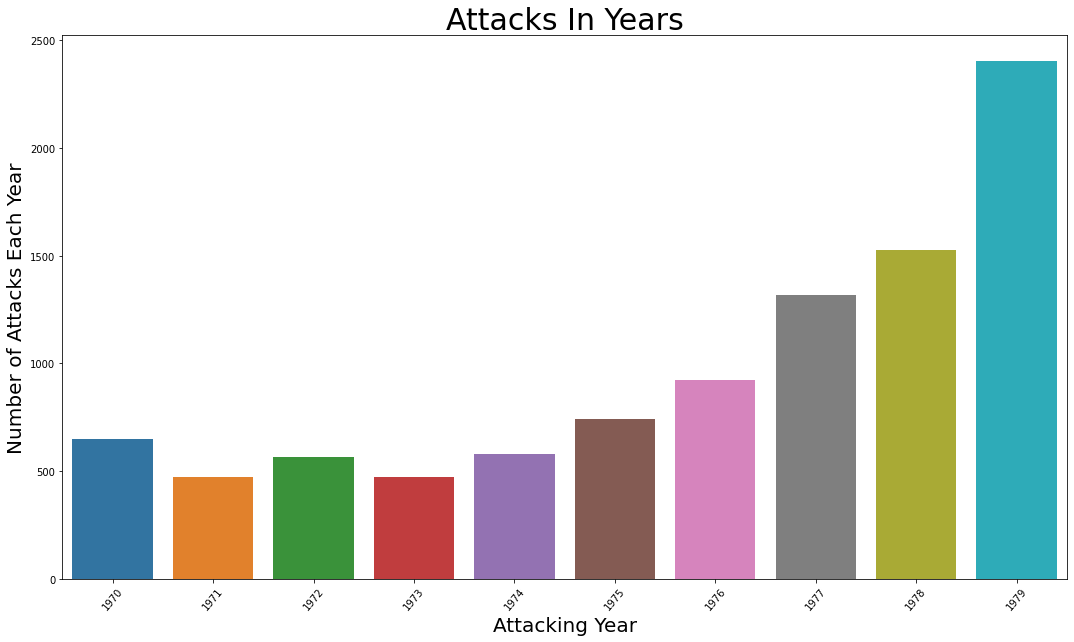

In [ ]:
year = data['Year'].unique()
years_count = data['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18,10))
sns.barplot(x = year,
           y = years_count)
plt.xticks(rotation = 50)
plt.xlabel('Attacking Year',fontsize=20)
plt.ylabel('Number of Attacks Each Year',fontsize=20)
plt.title('Attacks In Years',fontsize=30)
plt.show()

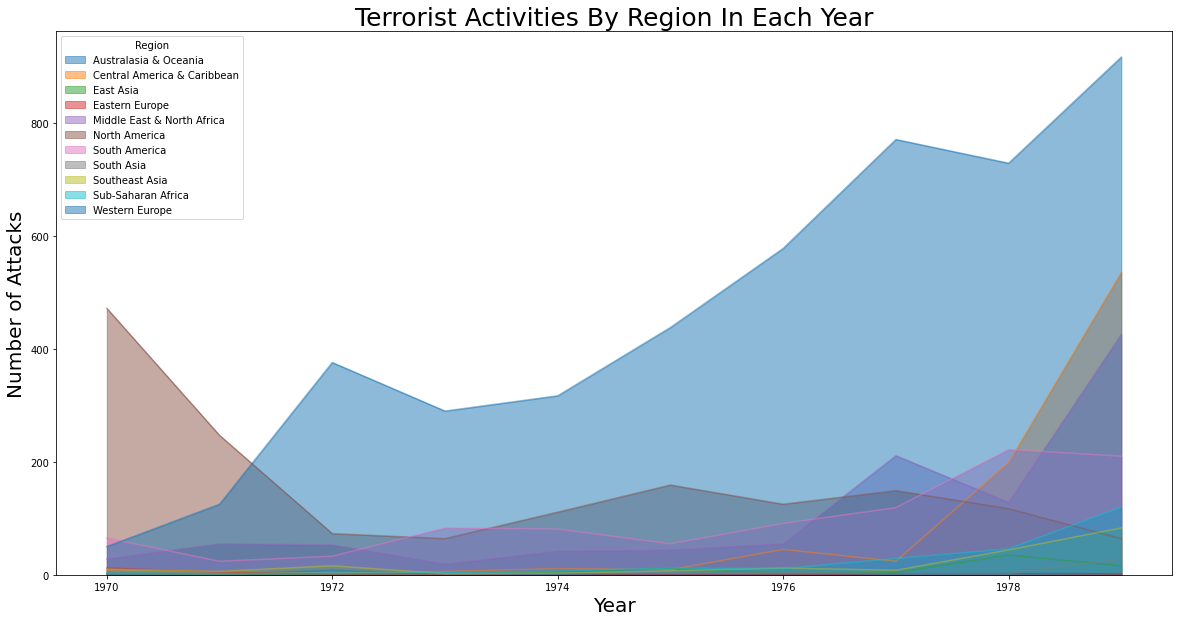

In [ ]:

pd.crosstab(data.Year, data.Region).plot(kind='area',stacked=False,figsize=(20,10))
plt.title('Terrorist Activities By Region In Each Year',fontsize=25)
plt.ylabel('Number of Attacks',fontsize=20)
plt.xlabel("Year",fontsize=20)
plt.show()

In [ ]:
attack = data.Country.value_counts()[:10]
attack

United Kingdom    1599
United States     1460
Italy              992
Spain              890
Turkey             475
France             464
Colombia           404
El Salvador        387
Argentina          326
Nicaragua          286
Name: Country, dtype: int64

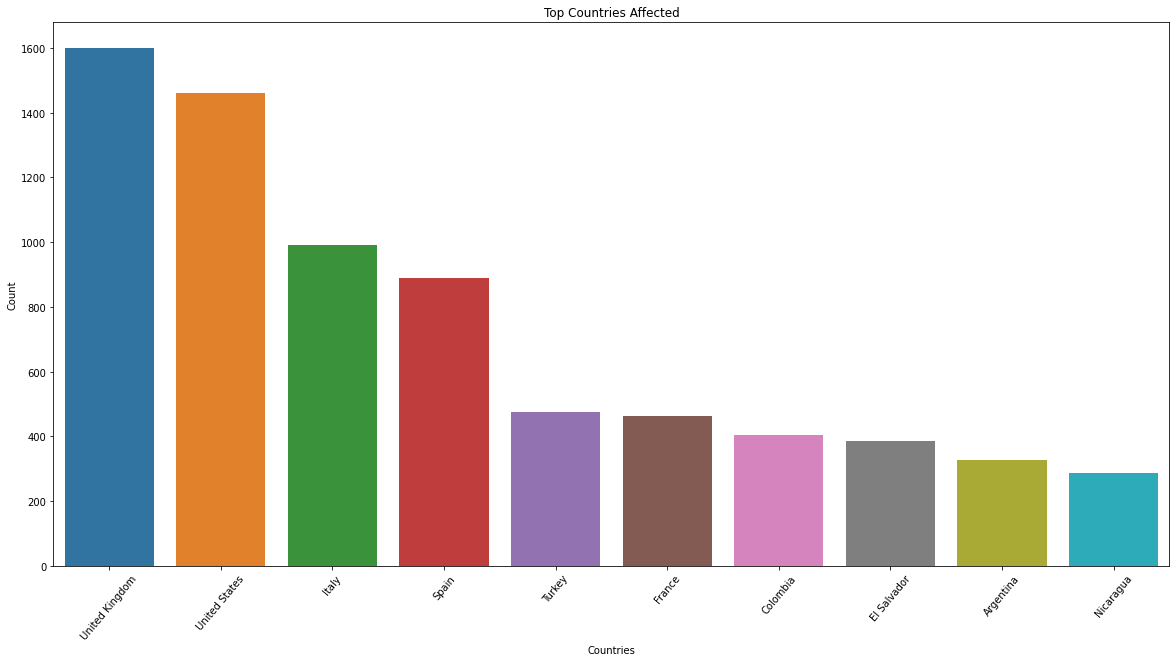

In [ ]:
plt.subplots(figsize=(20,10))
sns.barplot(data['Country'].value_counts()[:10].index,data['Country'].value_counts()[:10].values)
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation = 50)
plt.show()

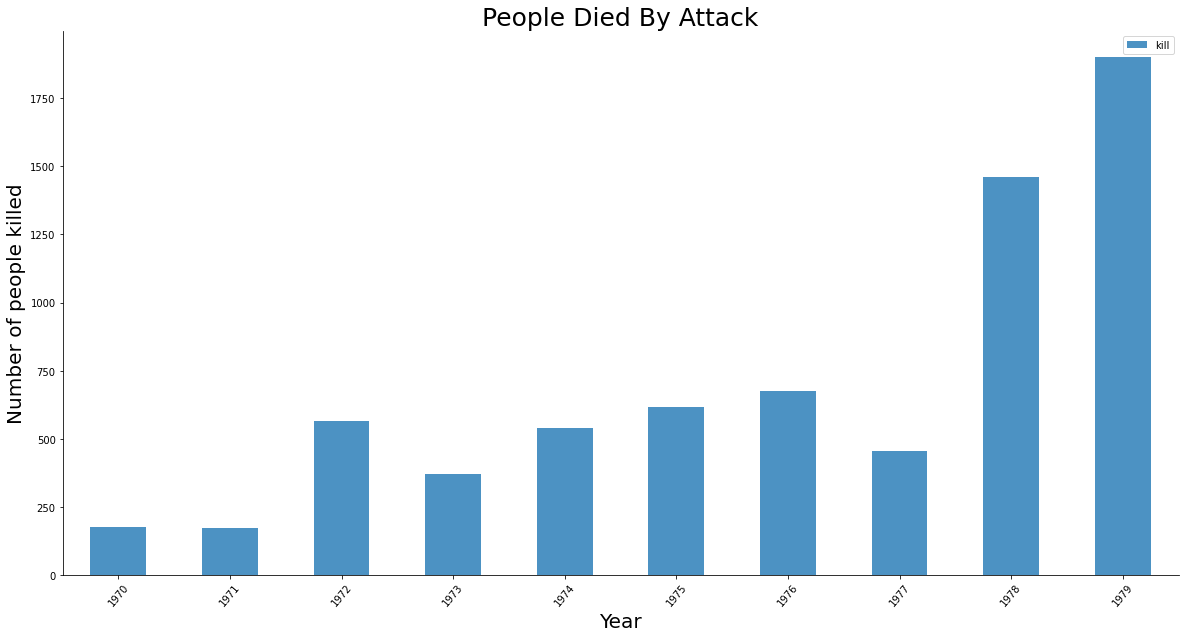

In [ ]:
df = data[['Year','kill']].groupby(['Year']).sum()
fig, ax4 = plt.subplots(figsize=(20,10))
df.plot(kind='bar',alpha=0.8,ax=ax4)
plt.xticks(rotation = 50)
plt.title("People Died By Attack",fontsize=25)
plt.ylabel("Number of people killed",fontsize=20)
plt.xlabel('Year',fontsize=20)
top_side = ax4.spines["top"]
top_side.set_visible(False)
right_side = ax4.spines["right"]
right_side.set_visible(False)

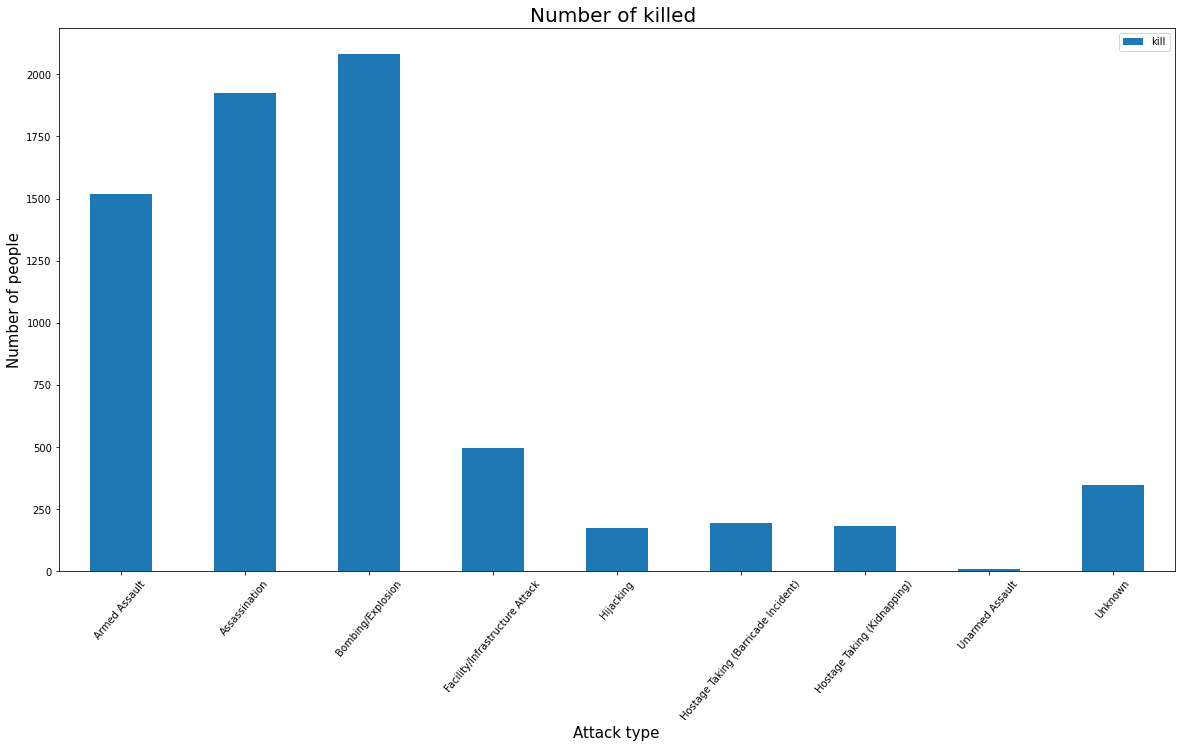

In [ ]:

data[['Attacktype','kill']].groupby(["Attacktype"],axis=0).sum().plot(kind='bar',figsize=(20,10))
plt.xticks(rotation=50)
plt.title("Number of killed ",fontsize=20)
plt.ylabel('Number of people',fontsize=15)
plt.xlabel('Attack type',fontsize=15)
plt.show()

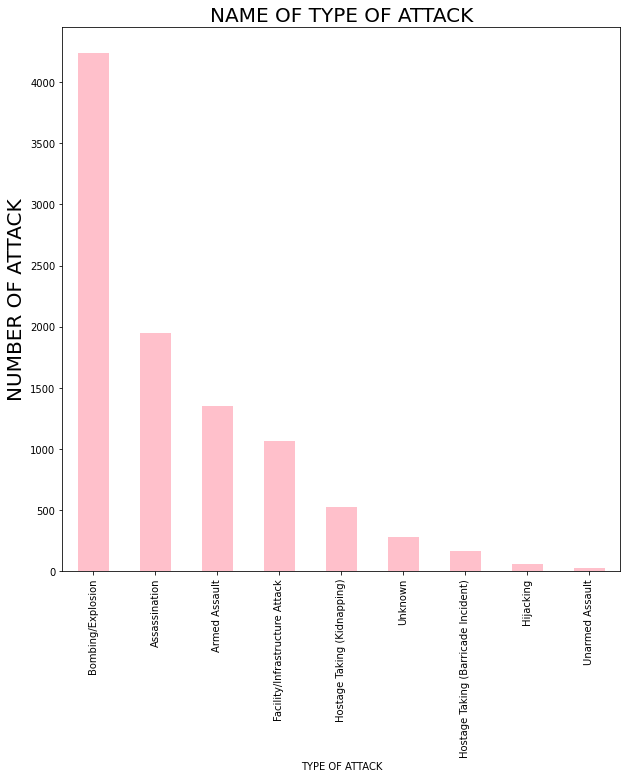

In [ ]:
data['Attacktype'].value_counts().plot(kind='bar',figsize=(10,10),color='pink')
## plt.xticks(rotation = 50)
plt.xlabel("TYPE OF ATTACK",fontsize=10)
plt.ylabel("NUMBER OF ATTACK",fontsize=20)
plt.title("NAME OF TYPE OF ATTACK",fontsize=20)
plt.show()

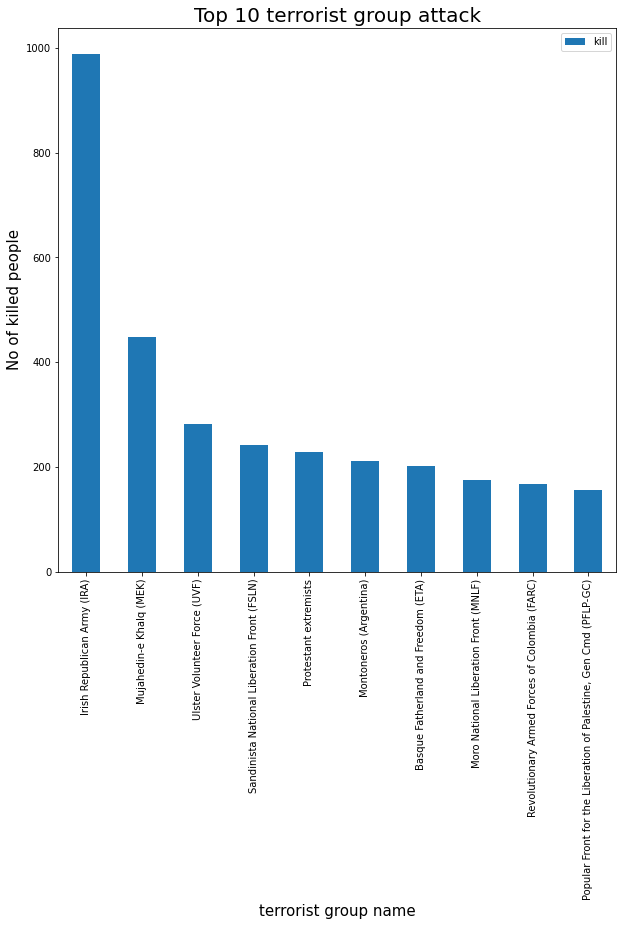

In [ ]:

data[['Group','kill']].groupby(['Group'],axis=0).sum().drop('Unknown').sort_values('kill',ascending=False).head(10).plot(kind='bar',figsize=(10,10))
plt.title("Top 10 terrorist group attack",fontsize=20)
plt.xlabel("terrorist group name",fontsize=15)
plt.ylabel("No of killed people",fontsize=15)
plt.show()